<a href="https://colab.research.google.com/github/ashreetsangotra/flutter_task/blob/main/Flutter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Flutter Project/data.xlsx')

In [4]:
df.shape

(109101, 8)

In [5]:
df.head()

,Row Number (Each row is one customer per month),Acquisition Cohort,Bet Month,Stakes,Gross Gaming Revenue (GGR),Net Gaming Revenue (NGR),Bonus,Actives
0,1,Acquired Pre 2022,2022-01-01,45.025,-3.54,-5.56,2.02,1
1,2,Acquired Pre 2022,2022-01-01,100.295,-7.41,-11.52,4.11,1
2,3,Acquired Pre 2022,2022-01-01,16.880,4.18,4.06,0.12,1
3,4,Acquired Pre 2022,2022-01-01,75.035,10.88,10.88,0.00,1
4,5,Acquired Pre 2022,2022-01-01,83.035,26.12,22.80,3.32,1


## Pre-processing

### Treating Date Values

In [6]:
df['Acquisition Cohort'].replace('Acquired Pre 2022','2021-12-01 00:00:00', inplace = True)

In [7]:
df['Acquisition Cohort'] = pd.to_datetime(df['Acquisition Cohort'])

### Outlier Detection

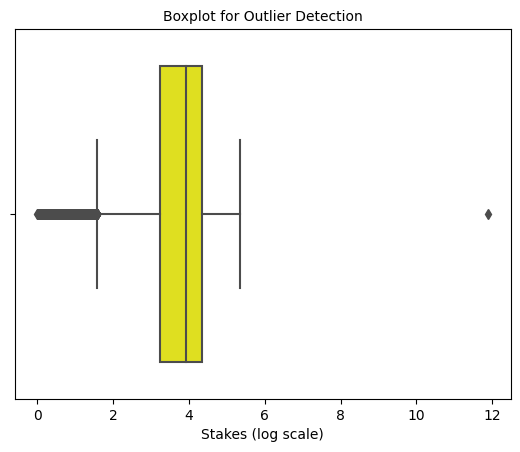

In [8]:
sns.boxplot(x = np.log(df['Stakes']), color='yellow')
plt.xlabel('Stakes (log scale)')
plt.title('Boxplot for Outlier Detection', size = 10)
plt.show()

In [9]:
# Outlier Row
df.sort_values(by ='Stakes',ascending = False)[:1]

,Row Number (Each row is one customer per month),Acquisition Cohort,Bet Month,Stakes,Gross Gaming Revenue (GGR),Net Gaming Revenue (NGR),Bonus,Actives
45717,45718,2021-12-01,2022-05-01,147143.0,735.72,680.72,55.0,1


In [10]:
# Dropping the outlier
df_with_outlier = df.copy()
df.drop(index = df.sort_values(by = 'Stakes', ascending = False).index[0], inplace = True)

In [11]:
# Plotting Bar plots to see the total stakes per betting month before and after dropping the outlier
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct']

data = {'Month': months,
        'Without Outlier': df.groupby('Bet Month')['Stakes'].sum().values.tolist(), 
        'With Outlier': df_with_outlier.groupby('Bet Month')['Stakes'].sum().values.tolist()}

barplot_df = pd.DataFrame(data = data)
barplot_df.to_csv('Outlier before and after comparision.csv')

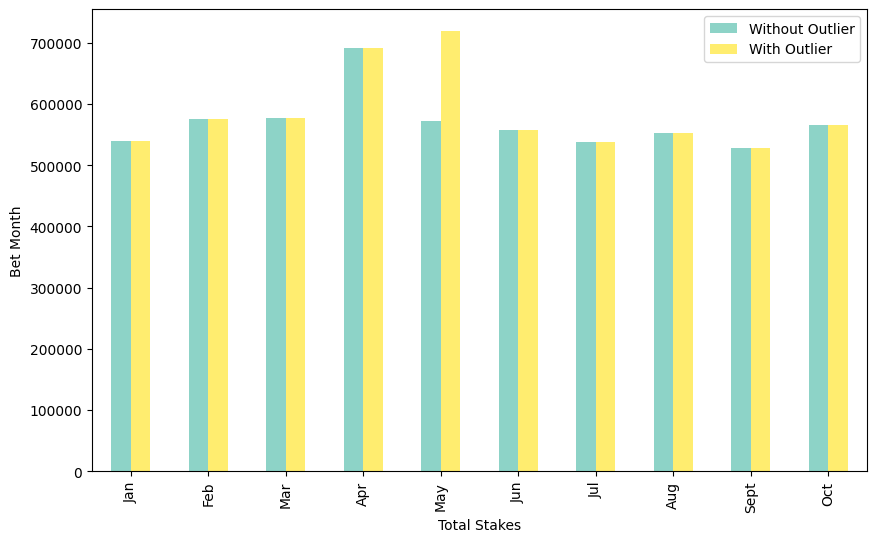

In [12]:
barplot_df.plot(x = 'Month', y = ['Without Outlier','With Outlier'], kind = 'bar', figsize = (10,6), colormap = 'Set3',
                xlabel = 'Total Stakes',ylabel = 'Bet Month')
plt.show()

## Correlations

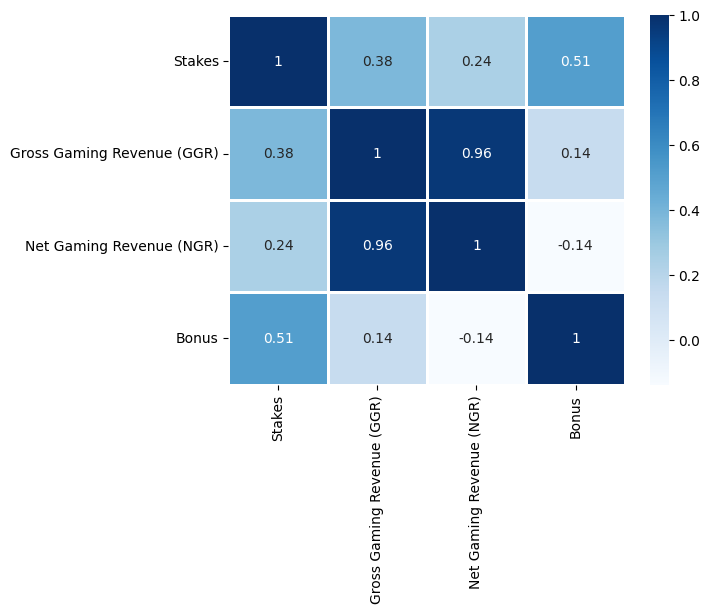

In [13]:
sns.heatmap(df[['Stakes','Gross Gaming Revenue (GGR)','Net Gaming Revenue (NGR)','Bonus']].corr(), cmap = 'Blues', annot = True, lw = 2)
plt.show()

In [14]:
# Total Number of customers acquired every month (Jan 2022 onwards)
df['Acquisition Cohort'].value_counts()

2021-12-01    96011
2022-01-01     2495
2022-02-01     2354
2022-03-01     2184
2022-04-01     2134
2022-05-01     1436
2022-06-01      867
2022-07-01      591
2022-08-01      538
2022-09-01      286
2022-10-01      204
Name: Acquisition Cohort, dtype: int64

In [15]:
# Total Number of customers placing bets in every month
df['Bet Month'].value_counts()

2022-04-01    11832
2022-02-01    11416
2022-03-01    11393
2022-05-01    10885
2022-06-01    10859
2022-08-01    10770
2022-10-01    10762
2022-01-01    10550
2022-07-01    10442
2022-09-01    10191
Name: Bet Month, dtype: int64

## Aggregated Stats

### By Acquisition Cohort

In [16]:
df_grouped_ac = df.groupby('Acquisition Cohort')[['Stakes','Gross Gaming Revenue (GGR)','Net Gaming Revenue (NGR)','Bonus']].mean().sort_index()
df_grouped_ac['GGR Percent'] = df_grouped_ac['Gross Gaming Revenue (GGR)'] / df_grouped_ac['Stakes'] * 100
df_grouped_ac['NGR Percent'] = df_grouped_ac['Net Gaming Revenue (NGR)'] / df_grouped_ac['Stakes'] * 100

round(df_grouped_ac,3)


,Stakes,Gross Gaming Revenue (GGR),Net Gaming Revenue (NGR),Bonus,GGR Percent,NGR Percent
Acquisition Cohort,,,,,,
2021-12-01,54.891,5.841,4.471,1.370,10.640,8.145
2022-01-01,24.201,2.414,1.550,0.864,9.973,6.403
2022-02-01,22.754,2.381,1.534,0.846,10.463,6.743
2022-03-01,22.775,2.349,1.479,0.869,10.313,6.495
2022-04-01,87.985,4.652,-4.985,9.637,5.287,-5.666
2022-05-01,21.950,2.198,1.306,0.892,10.015,5.950
2022-06-01,20.975,2.049,1.137,0.912,9.770,5.421
2022-07-01,19.658,2.068,1.172,0.895,10.519,5.964
2022-08-01,16.968,1.818,0.892,0.926,10.715,5.257


### By Bet Month

In [17]:
df_grouped_bm = df.groupby('Bet Month')[['Stakes','Gross Gaming Revenue (GGR)','Net Gaming Revenue (NGR)','Bonus']].mean().sort_index()
df_grouped_bm['GGR Percent'] = df_grouped_bm['Gross Gaming Revenue (GGR)'] / df_grouped_bm['Stakes'] * 100
df_grouped_bm['NGR Percent'] = df_grouped_bm['Net Gaming Revenue (NGR)'] / df_grouped_bm['Stakes'] * 100

round(df_grouped_bm,3)

,Stakes,Gross Gaming Revenue (GGR),Net Gaming Revenue (NGR),Bonus,GGR Percent,NGR Percent
Bet Month,,,,,,
2022-01-01,51.153,6.129,4.825,1.303,11.981,9.433
2022-02-01,50.460,5.988,4.666,1.323,11.868,9.246
2022-03-01,50.633,5.623,4.294,1.329,11.105,8.481
2022-04-01,58.477,5.713,3.137,2.575,9.769,5.365
2022-05-01,52.567,5.169,3.623,1.546,9.833,6.892
2022-06-01,51.350,5.120,3.755,1.365,9.971,7.313
2022-07-01,51.532,5.039,3.715,1.324,9.777,7.208
2022-08-01,51.305,5.198,3.889,1.309,10.132,7.580
2022-09-01,51.845,5.259,3.955,1.304,10.145,7.629


## Cumulative Stats

### By Acquisition Cohort

In [18]:
df.groupby('Acquisition Cohort')[['Stakes','Gross Gaming Revenue (GGR)','Net Gaming Revenue (NGR)','Bonus']].sum().sort_index()

,Stakes,Gross Gaming Revenue (GGR),Net Gaming Revenue (NGR),Bonus
Acquisition Cohort,,,,
2021-12-01,5270113.295,560759.31,429266.20,131493.11
2022-01-01,60382.739,6021.99,3866.04,2155.95
2022-02-01,53562.685,5604.10,3611.61,1992.49
2022-03-01,49739.794,5129.46,3230.71,1898.75
2022-04-01,187759.595,9927.07,-10638.25,20565.32
2022-05-01,31520.132,3156.60,1875.43,1281.17
2022-06-01,18184.894,1776.61,985.76,790.85
2022-07-01,11617.593,1222.02,692.84,529.18
2022-08-01,9128.549,978.12,479.85,498.27


### By Bet Month

In [19]:
df.groupby('Bet Month')[['Stakes','Gross Gaming Revenue (GGR)','Net Gaming Revenue (NGR)','Bonus']].sum().sort_index()

,Stakes,Gross Gaming Revenue (GGR),Net Gaming Revenue (NGR),Bonus
Bet Month,,,,
2022-01-01,539663.226,64657.50,50908.21,13749.29
2022-02-01,576054.253,68363.48,53263.48,15100.00
2022-03-01,576861.330,64062.63,48923.69,15138.94
2022-04-01,691902.826,67593.05,37120.32,30472.73
2022-05-01,572193.127,56262.87,39434.23,16828.64
2022-06-01,557608.902,55601.63,40780.63,14821.00
2022-07-01,538097.700,52612.24,38787.57,13824.67
2022-08-01,552553.233,55985.84,41883.22,14102.62
2022-09-01,528348.817,53598.51,40307.44,13291.07


## Plots

### GGR Density Plots

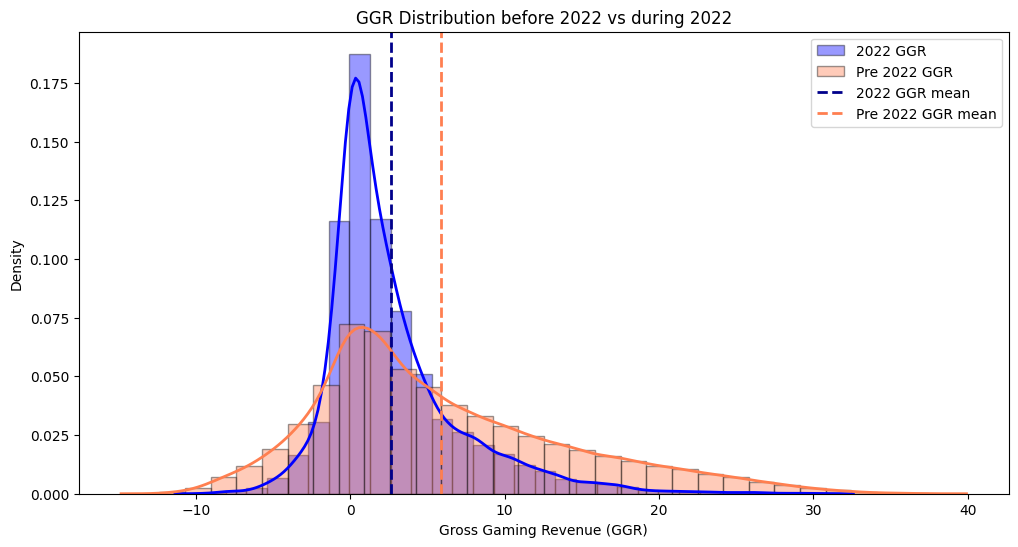

2022 GGR mean: £ 2.63
Pre 2022 GGR mean: £ 5.84


In [20]:
plt.figure(figsize = (12,6))
a = df[df['Acquisition Cohort'] != '2021-12-01']['Gross Gaming Revenue (GGR)']
b = df[df['Acquisition Cohort'] == '2021-12-01']['Gross Gaming Revenue (GGR)']

sns.distplot(a, bins = 30,hist_kws = dict(edgecolor="black", lw=1),color = 'blue',kde_kws = dict(lw = 2), label = '2022 GGR')
sns.distplot(b, bins = 30, hist_kws = dict(edgecolor="black", lw=1),color = 'coral', kde_kws = dict(lw = 2), label = 'Pre 2022 GGR')

plt.axvline(a.mean(), color = 'darkblue', lw = 2, linestyle='dashed', label = '2022 GGR mean')
plt.axvline(b.mean(), color = 'coral', lw = 2, linestyle='dashed', label = 'Pre 2022 GGR mean')
plt.title('GGR Distribution before 2022 vs during 2022')
plt.legend()
plt.show()

print('2022 GGR mean: £', round(a.mean(),2))
print('Pre 2022 GGR mean: £', round(b.mean(),2))

### NGR Density Plots

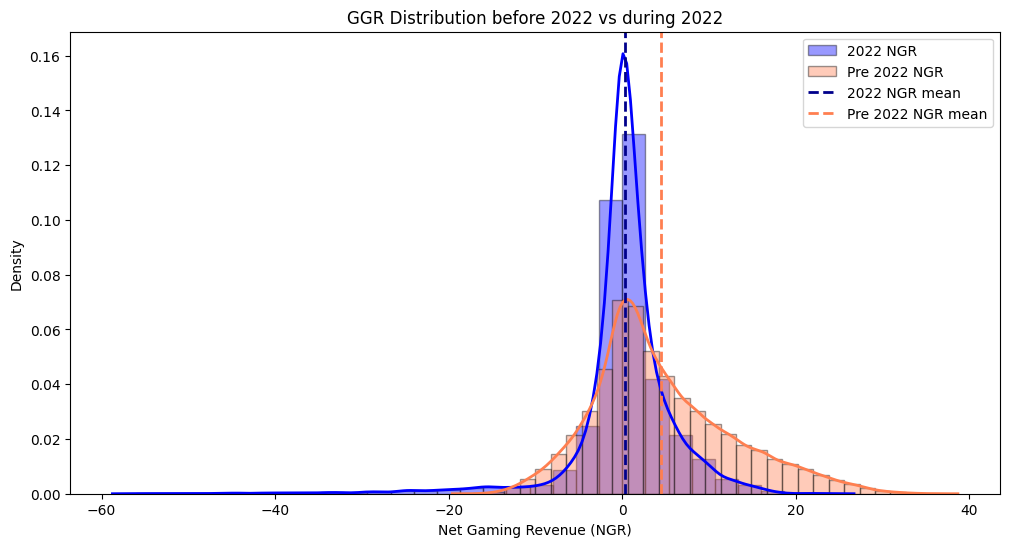

2022 NGR mean: £ 0.33
Pre 2022 NGR mean: £ 4.47


In [21]:
plt.figure(figsize = (12,6))
a = df[df['Acquisition Cohort'] != '2021-12-01']['Net Gaming Revenue (NGR)']
b = df[df['Acquisition Cohort'] == '2021-12-01']['Net Gaming Revenue (NGR)']

sns.distplot(a, bins = 30,hist_kws = dict(edgecolor="black", lw=1),color = 'blue',kde_kws = dict(lw = 2), label = '2022 NGR')
sns.distplot(b, bins = 30, hist_kws = dict(edgecolor="black", lw=1),color = 'coral', kde_kws = dict(lw = 2), label = 'Pre 2022 NGR')

plt.axvline(a.mean(), color = 'darkblue', lw = 2, linestyle='dashed', label = '2022 NGR mean')
plt.axvline(b.mean(), color = 'coral', lw = 2, linestyle='dashed', label = 'Pre 2022 NGR mean')
plt.title('GGR Distribution before 2022 vs during 2022')
plt.legend()
plt.show()

print('2022 NGR mean: £', round(a.mean(),2))
print('Pre 2022 NGR mean: £', round(b.mean(),2))

## Heatmap of Acquisition Cohort vs Betting Month

### Heatmap based on Count (Number of bets)


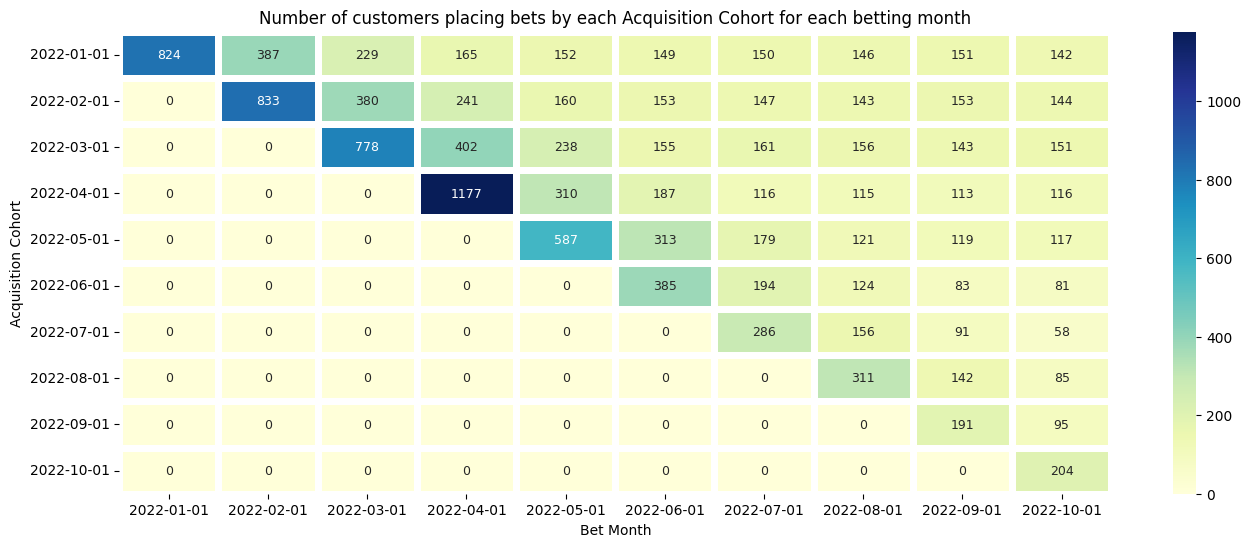

In [22]:
plt.figure(figsize = (16,6))
sns.heatmap(pd.crosstab(df[df['Acquisition Cohort'] != '2021-12-01']['Acquisition Cohort'].astype('string'),df['Bet Month'].astype('string')),
            cmap = 'YlGnBu', annot = True, annot_kws={"size":9},lw = 5, fmt = 'g')
plt.title('Number of customers placing bets by each Acquisition Cohort for each betting month')
plt.show()

### Heatmap based on mean of Stakes 

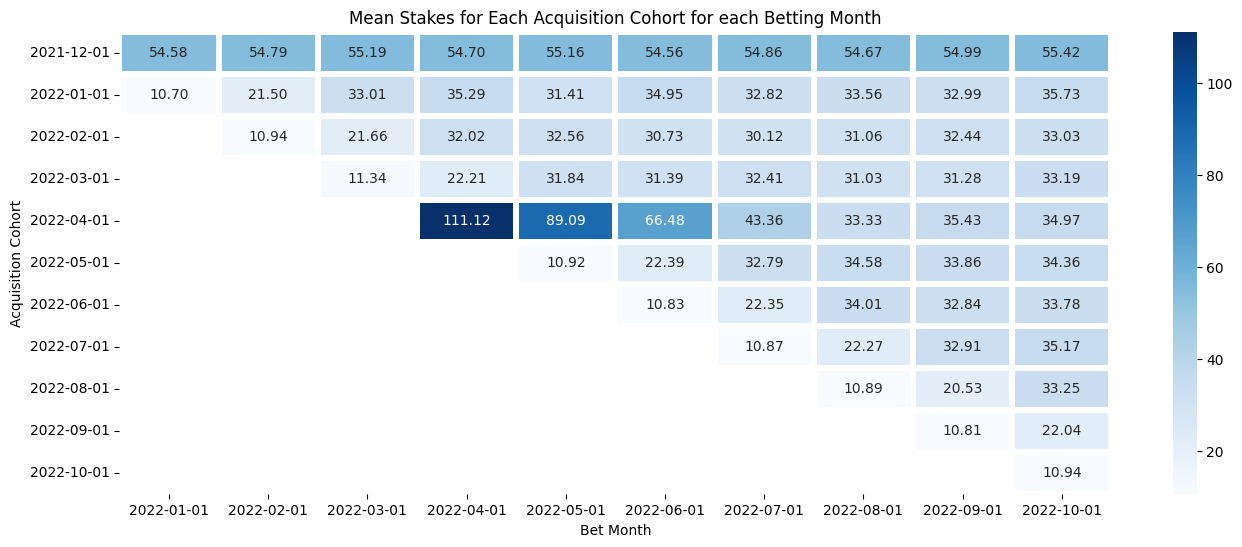

In [23]:
plt.figure(figsize = (16,6))
sns.heatmap(pd.crosstab(df['Acquisition Cohort'].astype('string'),df['Bet Month'].astype('string'),values = df['Stakes'],aggfunc = 'mean'),
            cmap = 'Blues',annot = True, linewidth = 3, fmt = '.2f')
plt.title('Mean Stakes for Each Acquisition Cohort for each Betting Month')
plt.show()